### **Mengimport Library**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

### **Deskripsi Data**

##### Fitur Input dan Tipe
The dataset consists of 70 000 records of patients data in 12 features
| Nama Fitur                | Tipe Fitur          | Nama Kolom dalam Data | Tipe Data                  |
|---------------------------|---------------------|------------------------|----------------------------|
| **Age**                   | Objective Feature   | age                    | int (days)                 |
| **Height**                | Objective Feature   | height                 | int (cm)                   |
| **Weight**                | Objective Feature   | weight                 | float (kg)                 |
| **Gender**                | Objective Feature   | gender                 | categorical code 1 - women, 2 - men          |
| **Systolic blood pressure** | Examination Feature | ap_hi                  | int (mm/Hg)                       |
| **Diastolic blood pressure** | Examination Feature | ap_lo                  | int (mm/Hg)                        |
| **Cholesterol**           | Examination Feature | cholesterol            | 1: normal, 2: above normal, 3: well above normal |
| **Glucose**               | Examination Feature | gluc                   | 1: normal, 2: above normal, 3: well above normal |
| **Smoking**               | Subjective Feature  | smoke                  | binary; 0: no, 1 : yes                     |
| **Alcohol intake**        | Subjective Feature  | alco                   | binary; 0: no, 1 : yes                     |
| **Physical activity**     | Subjective Feature  | active                 | binary; 0: no, 1 : yes                     |
| **Presence or absence of cardiovascular disease** | Target Variable     | cardio                 | binary; 0: healthy, 1 : cardio                     |


### **Load Data**

In [17]:
df = pd.read_csv('../data/cardio.csv', sep=';')

print('Sample Data')
display(df.head())


Sample Data


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### **Exploratory Data Analysis (EDA) Tahap 1**

In [18]:
print('\nInformasi Kolom\n')
display(df.info())

print('\nStatistika Deskriptif')
display(df.describe())

print('\nMengecek Missing Values')
display(df.isnull().sum())


Informasi Kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


None


Statistika Deskriptif


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000



Mengecek Missing Values


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

##### **Data Insights Sebelum Preprocessing**

**Usia (age)**
- Rata-rata usia (mean) adalah sekitar 19.469 hari (~53,3 tahun).
- Usia minimum adalah 10.798 hari (~29,6 tahun), dan usia maksimum adalah 23.713 hari (~64,9 tahun).
- Rentang usia ini menunjukkan bahwa dataset berfokus pada populasi dewasa, mungkin dengan fokus pada populasi yang berisiko terkena penyakit kardiovaskular.

**Jenis Kelamin (gender)**
- Data ini menggunakan 1 untuk perempuan dan 2 untuk laki-laki.
- Rata-rata gender adalah 1.35, yang menunjukkan bahwa dataset ini memiliki lebih banyak perempuan daripada laki-laki.

**Tinggi Badan (height)**
- Rata-rata tinggi badan adalah 164,36 cm, dengan standar deviasi 8,21 cm.
- Nilai minimum dan maksimum (55 cm hingga 250 cm) mengindikasikan adanya beberapa anomali data atau kesalahan pengukuran.

**Berat Badan (weight)**
- Berat badan rata-rata adalah 74,21 kg dengan standar deviasi 14,40 kg.
- Nilai berat minimum 10 kg dan maksimum 200 kg menunjukkan kemungkinan kesalahan atau anomali dalam data.

**Tekanan Darah Sistolik (ap_hi)**
- Nilai rata-rata adalah 128,82 mmHg, dengan standar deviasi yang sangat tinggi (154 mmHg).
- Ada nilai tekanan darah negatif (-150 mmHg), dan nilai maksimum yang sangat tinggi (16.020 mmHg), yang jelas merupakan outlier atau kesalahan input data.

**Tekanan Darah Diastolik (ap_lo)**
- Rata-rata tekanan diastolik adalah 96,63 mmHg.
- Sama seperti tekanan sistolik, terdapat outlier ekstrem (negatif hingga 11.000 mmHg), yang mengindikasikan kesalahan atau outlier dalam data.

**Kolesterol (cholesterol)**
- Data ini diklasifikasikan ke dalam 3 kategori (1, 2, 3).
- Nilai rata-rata adalah 1,37, artinya sebagian besar subjek memiliki tingkat kolesterol normal (kategori 1), dengan sebagian lainnya memiliki tingkat kolesterol di atas normal (kategori 2 atau 3).

**Glukosa (gluc)**
- Sama dengan kolesterol, glukosa juga diklasifikasikan menjadi 3 kategori.
- Rata-rata adalah 1,23, menunjukkan sebagian besar orang memiliki kadar glukosa normal.

**Perilaku Merokok (smoke)**
- Hanya sekitar 8,8% dari sampel yang merokok, ditunjukkan oleh nilai rata-rata 0,088.

**Konsumsi Alkohol (alco)**
- Rata-rata adalah 0,053, menunjukkan hanya sekitar 5,3% orang yang mengonsumsi alkohol secara rutin.

**Aktivitas Fisik (active)**
- Sebagian besar individu aktif secara fisik (rata-rata 0,80), yang berarti sekitar 80% dari data mewakili orang-orang yang terlibat dalam aktivitas fisik.

**Penyakit Kardiovaskular (cardio)**
- Dataset cukup seimbang terkait label target ini, dengan rata-rata 0,50, yang menunjukkan bahwa sekitar 50% dari sampel memiliki kondisi kardiovaskular.


#### **Distribusi Variabel**

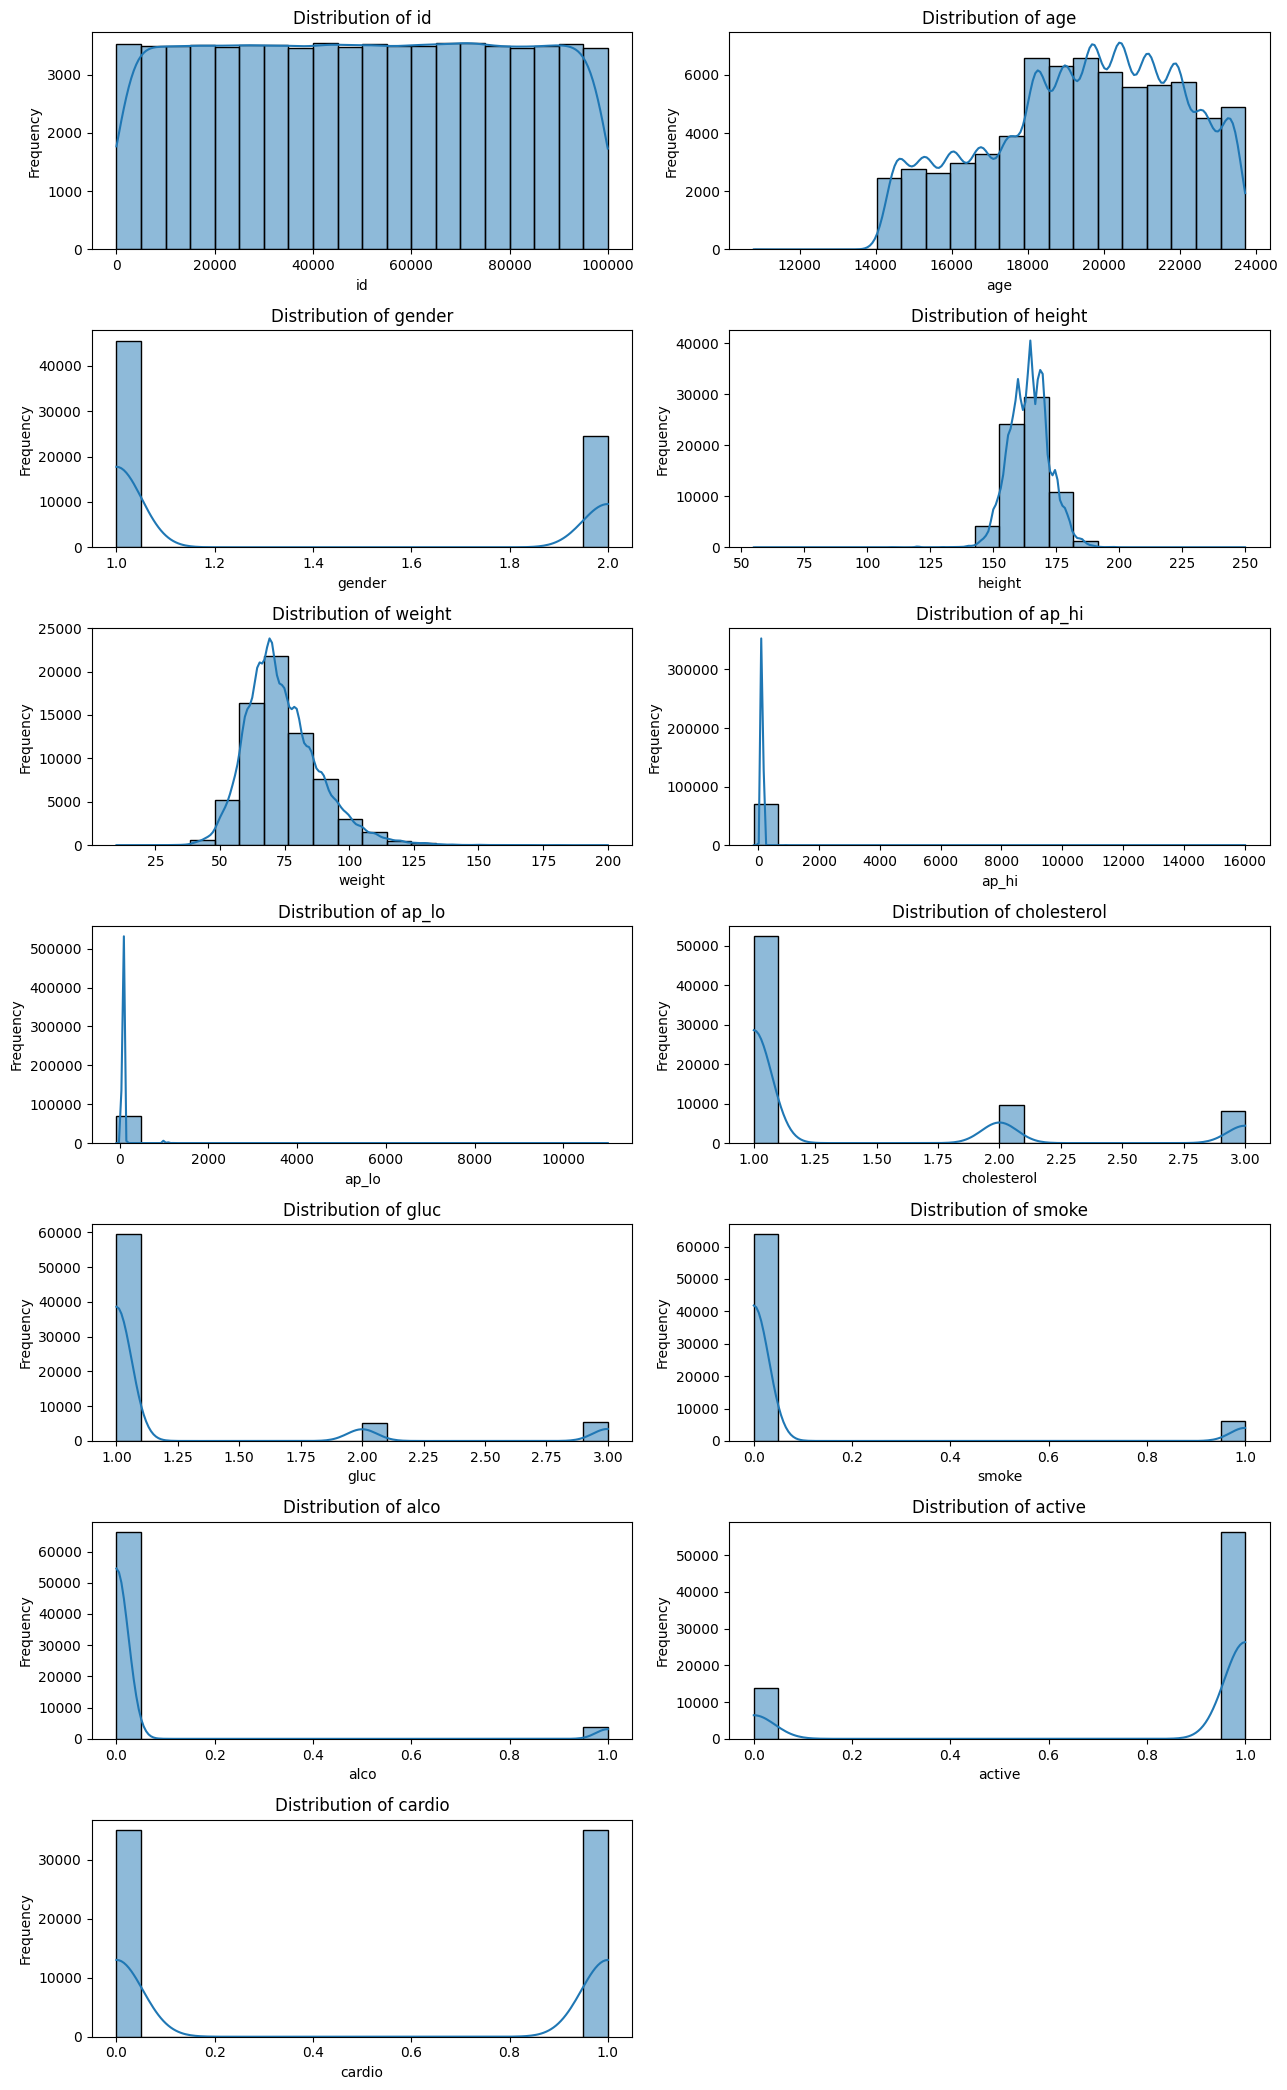

In [19]:
features = df.columns

num_features = len(features)
num_rows = (num_features + 1) // 2

plt.figure(figsize=(13, num_rows * 3))

for i, feature in enumerate(features):
    plt.subplot(num_rows, 2, i + 1)

    data = df[feature]
    xlabel = feature

    sns.histplot(data, bins=20, kde=True)
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### **Mengecek Outlier**

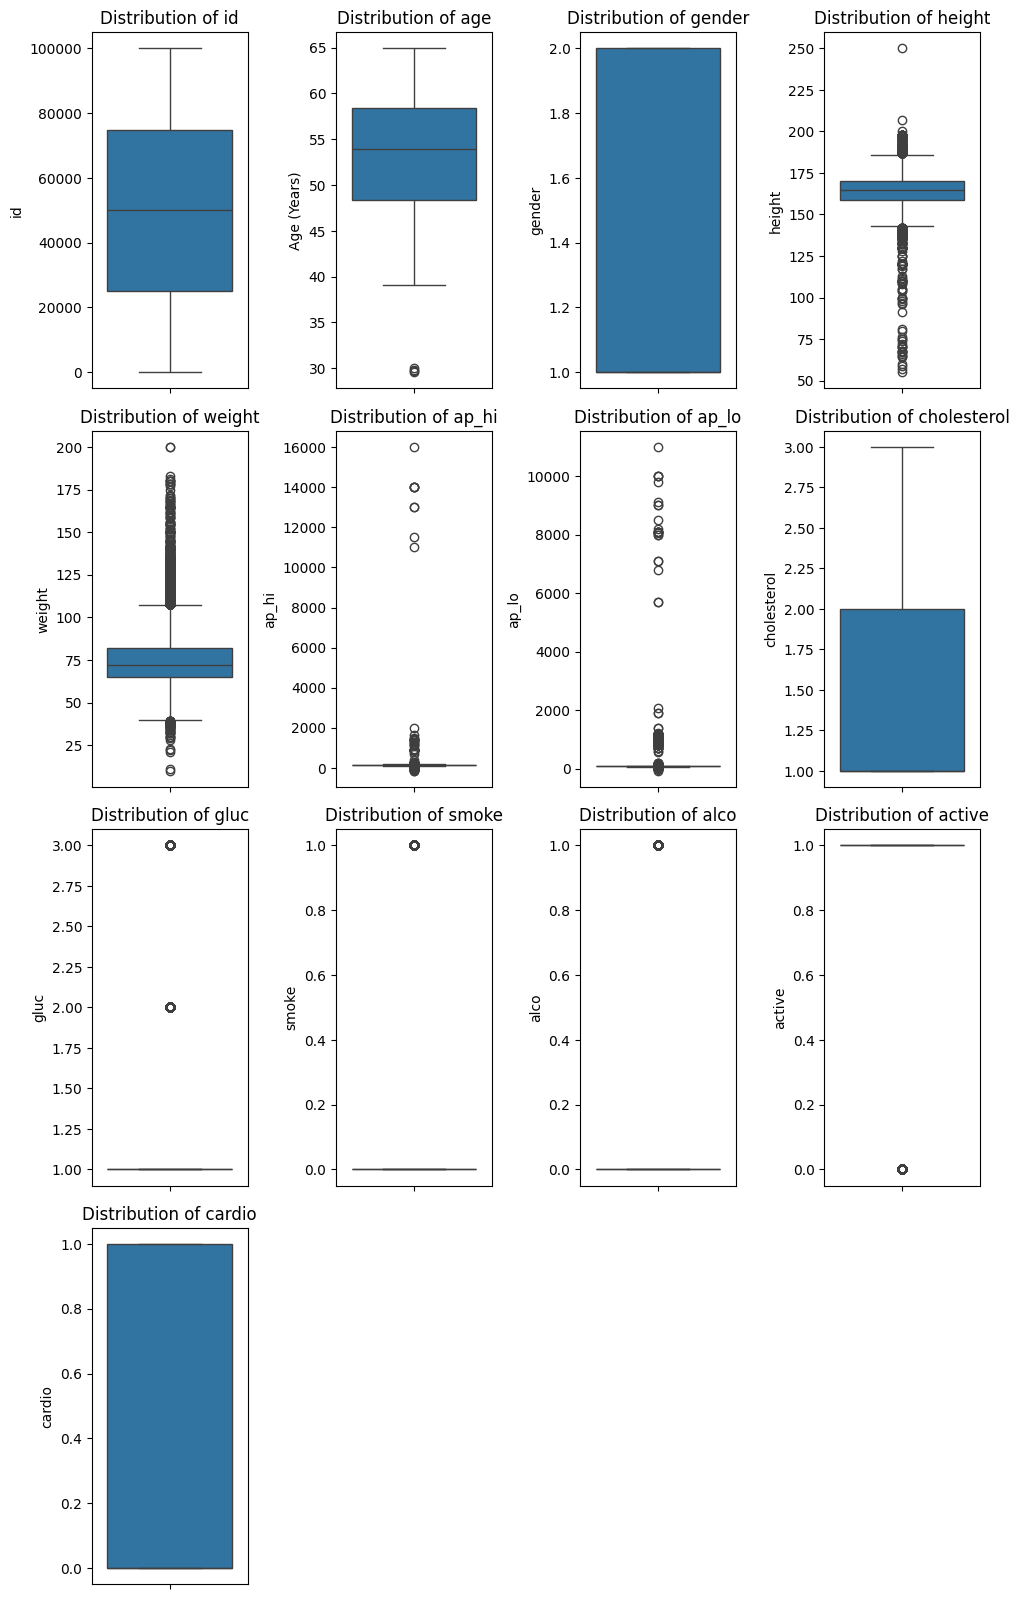

In [20]:
features = df.columns

num_features = len(features)
num_rows = (num_features + 1) // 2 

plt.figure(figsize=(10, num_rows * 4))

for i, feature in enumerate(features):
    plt.subplot(num_rows, 4, i + 1)
    
    if feature == 'age':
        data = df[feature] / 365.25  
        ylabel = 'Age (Years)'
    else:
        data = df[feature]
        ylabel = feature

    sns.boxplot(y=data)
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')  
    plt.ylabel(ylabel)

plt.tight_layout()
plt.show()

### **Data Preprocessing**

In [21]:
df = pd.read_csv('../data/cardio.csv', sep=';')

print('Sample Data')
display(df.head())

Sample Data


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [22]:
# Systolic and diastolic blood pressure must not be negative
df = df[(df['ap_hi'] > 0) & (df['ap_lo'] > 0)]

# Systolic blood pressure must be higher than diastolic blood pressure
df = df[df['ap_hi'] > df['ap_lo']]

# Height values must be within a reasonable range (e.g., between 100 cm and 200 cm)
df = df[(df['height'] >= 100) & (df['height'] <= 200)]

# Weight values must be within a reasonable range (e.g., between 30 kg and 200 kg)
df = df[(df['weight'] >= 30) & (df['weight'] <= 200)]

# Remove outliers
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1  # Calculate IQR

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to remove outliers in specific columns
columns_to_clean = ['ap_hi', 'ap_lo']
df = remove_outliers_iqr(df, columns_to_clean)

# Handle categorical values that may be incorrect
# Ensure gender only contains values 1 or 2
df = df[(df['gender'] == 1) | (df['gender'] == 2)]

# Convert the 'age' column from days to years
df['age'] = (df['age'] / 365).astype(int)

# Reset the index after cleaning the data
df.reset_index(drop=True, inplace=True)

# Encode categorical data
le = LabelEncoder()

# 1: Female, 2: Male -> 0: Female, 1: Male
df['gender'] = le.fit_transform(df['gender']) 

# 1: normal, 2: above normal, 3: well above normal -> 0: normal, 1: above normal, 2: well above normal
df['cholesterol'] = le.fit_transform(df['cholesterol']) 

# 1: normal, 2: above normal, 3: well above normal -> 0: normal, 1: above normal, 2: well above normal
df['gluc'] = le.fit_transform(df['gluc'])

df = df.drop(columns=['id'])

display(df.describe())


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000,64467.000000
mean,52.904106,0.351839,164.488467,74.260714,126.625979,81.787969,0.364326,0.225743,0.087595,0.053035,0.803496,0.498410
std,6.743241,0.477548,7.942318,14.114108,14.383814,7.711925,0.680308,0.572752,0.282707,0.224105,0.397357,0.500001
min,29.000000,0.000000,100.000000,30.000000,90.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,1.000000,198.000000,200.000000,170.000000,105.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


##### **Data Insights Setelah Preprocessing**

**Jumlah data yang digunakan**
- Setelah preprocessing, jumlah data yang tersisa adalah 64,469. Ada pengurangan data dari 70,000 data awal, yang menunjukkan bahwa sekitar 5,531 data dihapus karena anomali atau outlier.

**Rata-rata Usia**
- Usia rata-rata adalah sekitar 53 tahun. Ini menunjukkan bahwa dataset ini mayoritas terdiri dari orang-orang paruh baya, yang umumnya memiliki risiko lebih tinggi terhadap penyakit kardiovaskular.

**Distribusi Gender**
- Nilai gender 1 (perempuan) dan 2 (laki-laki) setelah preprocessing memiliki rata-rata 1.35, yang menunjukkan bahwa data sedikit lebih condong ke perempuan.

**Tinggi dan Berat Badan**
- Rata-rata tinggi adalah 164.49 cm dan rata-rata berat badan adalah 74.26 kg. Ini adalah data yang cukup normal untuk populasi umum. Namun, tetap ada rentang yang cukup besar antara nilai minimum dan maksimum pada tinggi dan berat badan.

**Tekanan Darah (ap_hi dan ap_lo)**
- Setelah preprocessing, tekanan darah sistolik (ap_hi) rata-rata adalah 126.63 mmHg dan tekanan darah diastolik (ap_lo) rata-rata adalah 81.79 mmHg. Kedua nilai ini masih berada dalam kisaran normal untuk tekanan darah.
- Nilai maksimum untuk tekanan darah sistolik dan diastolik telah menjadi lebih realistis setelah pembersihan, dengan tekanan sistolik maksimum 170 mmHg dan diastolik maksimum 105 mmHg. Ini masih mungkin terjadi pada pasien hipertensi.

**Kolesterol dan Glukosa**
- Rata-rata kolesterol adalah 1.36, yang menunjukkan bahwa mayoritas pasien memiliki kadar kolesterol normal (nilai 1). Demikian juga, nilai glukosa rata-rata adalah 1.22, yang menunjukkan sebagian besar pasien memiliki kadar glukosa yang normal.

**Kebiasaan Merokok, Konsumsi Alkohol, dan Aktivitas Fisik**
- Persentase perokok dalam data sangat kecil, dengan rata-rata 0.087 atau sekitar 8.7% dari populasi.
Konsumsi alkohol juga rendah, dengan rata-rata 0.053 atau sekitar 5.3% dari populasi.
- Rata-rata aktivitas fisik adalah 0.803, menunjukkan bahwa sekitar 80% dari populasi dianggap aktif secara fisik.

**Penyakit Kardiovaskular (Cardio)**
- Proporsi data dengan penyakit kardiovaskular (cardio = 1) adalah 49.8%, menunjukkan bahwa hampir separuh dari populasi ini terdiagnosis dengan penyakit kardiovaskular, yang konsisten dengan data populasi umum untuk orang-orang paruh baya.

In [23]:
display(df.head())

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62.0,110,80,0,0,0,0,1,0
1,55,0,156,85.0,140,90,2,0,0,0,1,1
2,51,0,165,64.0,130,70,2,0,0,0,0,1
3,48,1,169,82.0,150,100,0,0,0,0,1,1
4,60,0,151,67.0,120,80,1,1,0,0,0,0


In [24]:
#df.to_csv('../data/cleaned_data.csv', index=False)

### **Exploratory Data Analysis (EDA) Tahap 2**

#### **Korelasi**

In [25]:
correlations = df.corr()

correlation_with_target = correlations['cardio']

print(correlation_with_target)

age            0.232666
gender        -0.002140
height        -0.020777
weight         0.165073
ap_hi          0.431964
ap_lo          0.337127
cholesterol    0.219160
gluc           0.085997
smoke         -0.019152
alco          -0.010668
active        -0.037409
cardio         1.000000
Name: cardio, dtype: float64


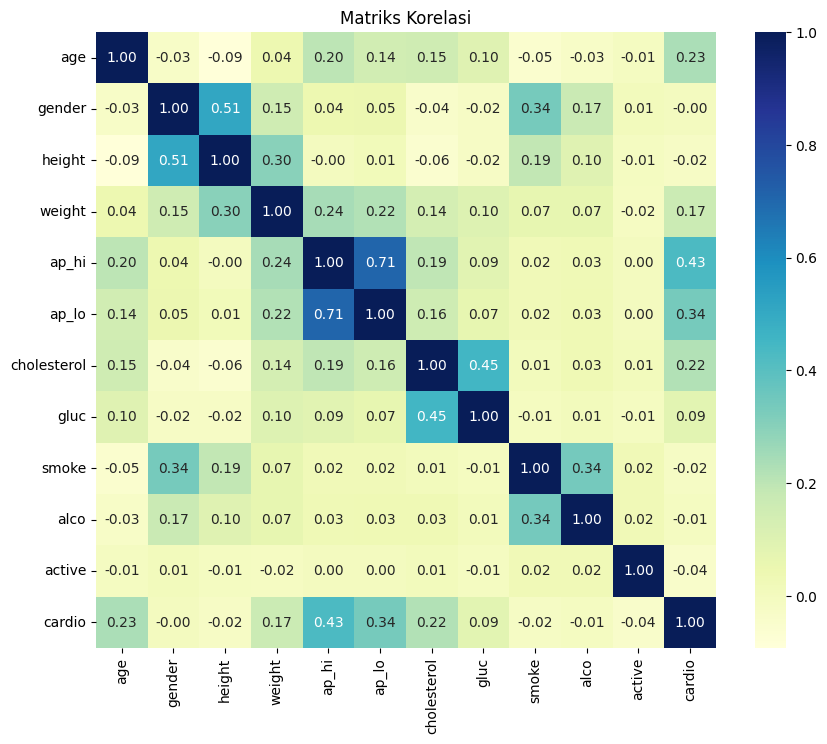

In [26]:
correlations = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

#### **Mengecek Imbalance Data**

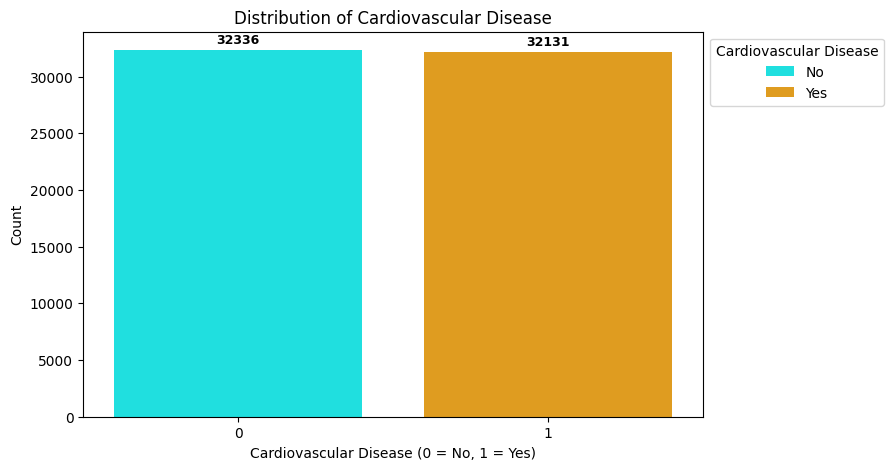

In [27]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x='cardio', data=df, hue='cardio', palette={0: 'aqua', 1: 'orange'})

plt.title('Distribution of Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=9, color='black', fontweight='bold', 
                    xytext=(0, 5), textcoords='offset points')

plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'], loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

- Terdapat 32,337 pasien yang tidak memiliki penyakit kardiovaskular (nilai 0) dan 32,132 pasien yang memiliki penyakit kardiovaskular (nilai 1).
- Dataset ini cukup seimbang dengan hanya selisih 205 data antara pasien dengan dan tanpa penyakit kardiovaskular, sehingga model machine learning tidak rentan terhadap masalah ketidakseimbangan kelas.

#### **Distribusi Umur terhadap Penyakit Cardio**

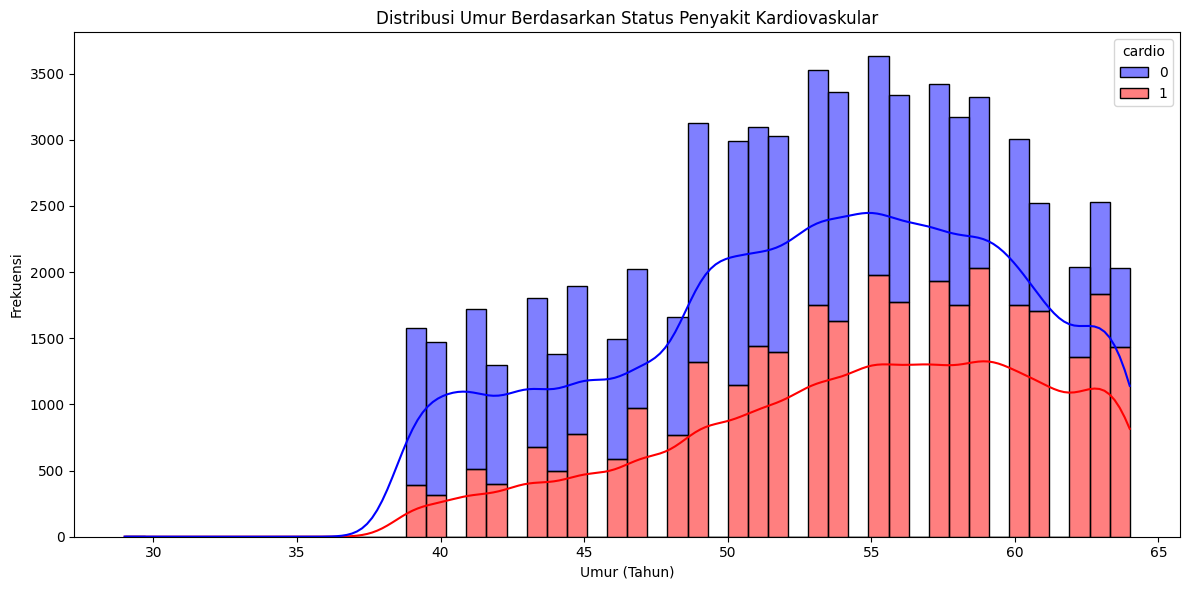

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df['age'], hue='cardio', multiple='stack', bins=50, kde=True, palette={0: 'blue', 1: 'red'})
plt.title('Distribusi Umur Berdasarkan Status Penyakit Kardiovaskular')
plt.xlabel('Umur (Tahun)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


- Penyakit kardiovaskular lebih umum terjadi pada usia di atas 45 tahun, dengan puncak kasus pada rentang usia 50-60 tahun.
- Risiko penyakit kardiovaskular meningkat seiring bertambahnya usia, terutama setelah usia 45 tahun.

#### **Distribusi Kolesterol dan Glukosa terhadap Penyakit Cardio**

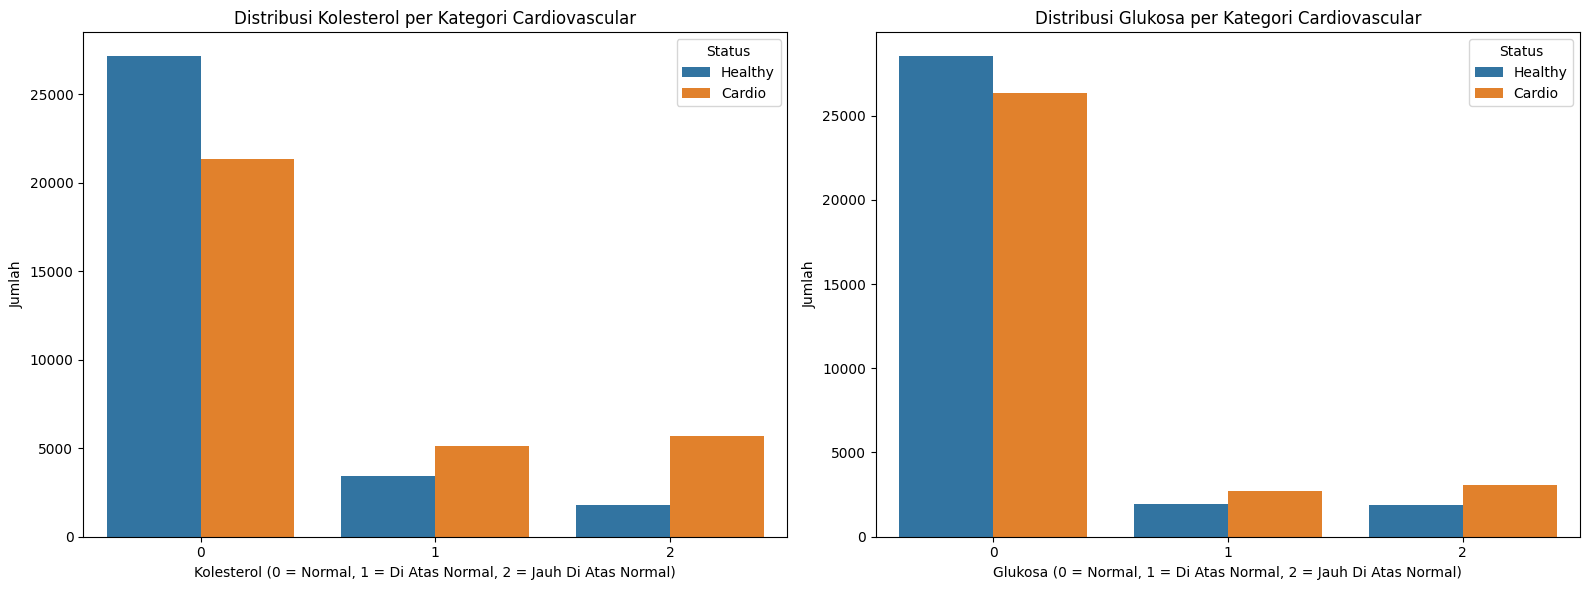

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='cholesterol', hue='cardio', data=df, ax=axs[0])
axs[0].set_title('Distribusi Kolesterol per Kategori Cardiovascular')
axs[0].set_xlabel('Kolesterol (0 = Normal, 1 = Di Atas Normal, 2 = Jauh Di Atas Normal)')
axs[0].set_ylabel('Jumlah')
axs[0].legend(title='Status', labels=['Healthy', 'Cardio'])

sns.countplot(x='gluc', hue='cardio', data=df, ax=axs[1])
axs[1].set_title('Distribusi Glukosa per Kategori Cardiovascular')
axs[1].set_xlabel('Glukosa (0 = Normal, 1 = Di Atas Normal, 2 = Jauh Di Atas Normal)')
axs[1].set_ylabel('Jumlah')
axs[1].legend(title='Status', labels=['Healthy', 'Cardio'])

plt.tight_layout() 
plt.show()


#### **Distribusi Gaya Hidup terhadap Penyakit Cardio**

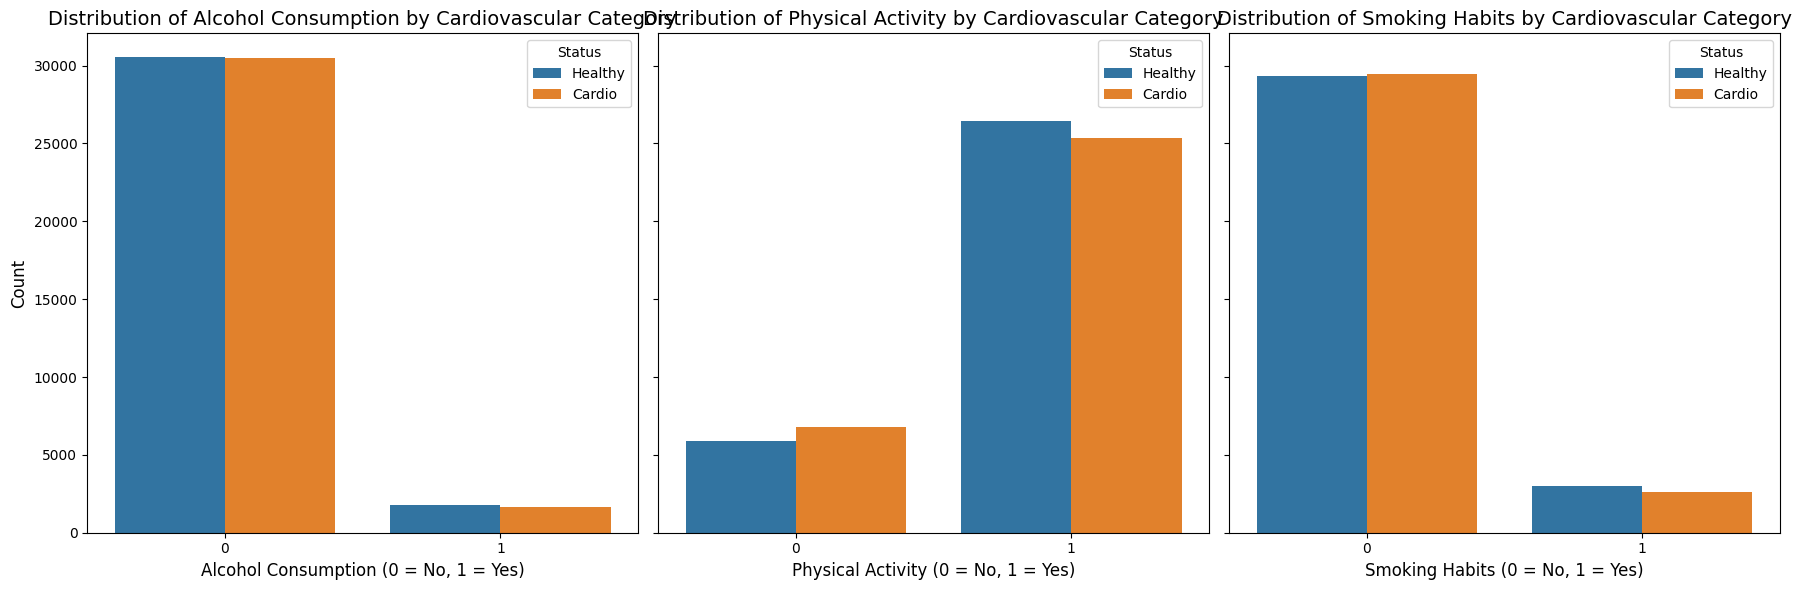

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Alcohol Consumption
sns.countplot(x='alco', hue='cardio', data=df, ax=axs[0])
axs[0].set_title('Distribution of Alcohol Consumption by Cardiovascular Category', fontsize=14)
axs[0].set_xlabel('Alcohol Consumption (0 = No, 1 = Yes)', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].legend(title='Status', labels=['Healthy', 'Cardio'], fontsize=10)

# Plot for Physical Activity
sns.countplot(x='active', hue='cardio', data=df, ax=axs[1])
axs[1].set_title('Distribution of Physical Activity by Cardiovascular Category', fontsize=14)
axs[1].set_xlabel('Physical Activity (0 = No, 1 = Yes)', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].legend(title='Status', labels=['Healthy', 'Cardio'], fontsize=10)

# Plot for Smoking Habits
sns.countplot(x='smoke', hue='cardio', data=df, ax=axs[2])
axs[2].set_title('Distribution of Smoking Habits by Cardiovascular Category', fontsize=14)
axs[2].set_xlabel('Smoking Habits (0 = No, 1 = Yes)', fontsize=12)
axs[2].set_ylabel('Count', fontsize=12)
axs[2].legend(title='Status', labels=['Healthy', 'Cardio'], fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### **Feature Engineering**

In [ ]:
# Body Mass Index (BMI)
df['bmi'] = round(df['weight'] / (df['height'] / 100) ** 2,2)

# Pulse Pressure (PP)
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

# Mean Arterial Pressure (MAP)
df['map'] = round((df['ap_hi'] + 2 * df['ap_lo']) / 3,2)

# Systolic-to-Diastolic Ratio
df['std_ratio'] = round(df['ap_hi'] / df['ap_lo'],2)

In [32]:
# display(df.head())
# display(df.info())

In [33]:
# # Encode gender, cholesterol, gluc, and lifestyle_score using LabelEncoder (if they are ordinal)
# label_encoders = {}
# for column in ['gender']:
#     le = LabelEncoder()
#     df[column] = le.fit_transform(df[column])
#     label_encoders[column] = le  # Save the encoder for inverse_transform if needed

In [34]:
# display(df.head())

In [35]:
# categorical_columns=['age_group', 'blood_pressure_category', 'obesity_level']
# for col in categorical_columns:
#     print(f"Unique values in {col}:")
#     print(df[col].unique())
#     print()

In [36]:
# # Definisikan urutan untuk setiap fitur ordinal
# age_group_order = {'Young': 0, 'Middle-aged': 1, 'Senior': 2}
# blood_pressure_order = {'Normal': 0, 'Elevated': 1, 'Hypertension Stage 1': 2, 'Hypertension Stage 2': 3}
# obesity_level_order = {'Underweight': 0, 'Normal weight': 1, 'Overweight': 2, 'Obesity': 3}

# # Encode menggunakan map
# df['age_group'] = df['age_group'].map(age_group_order)
# df['blood_pressure_category'] = df['blood_pressure_category'].map(blood_pressure_order)
# df['obesity_level'] = df['obesity_level'].map(obesity_level_order)

In [37]:
# display(df.head())

In [38]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure,map,std_ratio
0,50,1,168,62.0,110,80,0,0,0,0,1,0,21.97,30,90.00,1.38
1,55,0,156,85.0,140,90,2,0,0,0,1,1,34.93,50,106.67,1.56
2,51,0,165,64.0,130,70,2,0,0,0,0,1,23.51,60,90.00,1.86
3,48,1,169,82.0,150,100,0,0,0,0,1,1,28.71,50,116.67,1.50
4,60,0,151,67.0,120,80,1,1,0,0,0,0,29.38,40,93.33,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64462,57,0,165,80.0,150,80,0,0,0,0,1,1,29.38,70,103.33,1.88
64463,52,1,168,76.0,120,80,0,0,1,0,1,0,26.93,40,93.33,1.50
64464,61,0,158,126.0,140,90,1,1,0,0,1,1,50.47,50,106.67,1.56
64465,61,0,163,72.0,135,80,0,1,0,0,0,1,27.10,55,98.33,1.69


<!-- ## Fitur Input dan Tipe

Dataset terdiri dari 70,000 data pasien dengan 19 fitur berikut:

| Nama Fitur                     | Tipe Fitur           | Nama Kolom dalam Data       | Tipe Data                                  |
|--------------------------------|----------------------|-----------------------------|--------------------------------------------|
| **Age**                        | Objective Feature    | age                         | int (years)                                |
| **Gender**                     | Objective Feature    | gender                      | binary; 0: female, 1: male                |
| **Height**                     | Objective Feature    | height                      | int (cm)                                   |
| **Weight**                     | Objective Feature    | weight                      | float (kg)                                 |
| **Systolic blood pressure**    | Examination Feature  | ap_hi                       | int (mm/Hg)                                |
| **Diastolic blood pressure**   | Examination Feature  | ap_lo                       | int (mm/Hg)                                |
| **Cholesterol**                | Examination Feature  | cholesterol                 | ordinal; 1: normal, 2: above normal, 3: well above normal |
| **Glucose**                    | Examination Feature  | gluc                        | ordinal; 1: normal, 2: above normal, 3: well above normal |
| **Smoking**                    | Subjective Feature   | smoke                       | binary; 0: no, 1: yes                      |
| **Alcohol intake**             | Subjective Feature   | alco                        | binary; 0: no, 1: yes                      |
| **Physical activity**          | Subjective Feature   | active                      | binary; 0: no, 1: yes                      |
| **Body Mass Index (BMI)**      | Derived Feature      | bmi                         | float                                      |
| **Age Group**                  | Derived Feature      | age_group                   | ordinal; 0: Young, 1: Middle-aged, 2: Senior |
| **Blood Pressure Category**    | Derived Feature      | blood_pressure_category     | ordinal; 0: Normal, 1: Elevated, 2: Hypertension Stage 1, 3: Hypertension Stage 2 |
| **Pulse Pressure**             | Derived Feature      | pulse_pressure              | int (mm/Hg)                                |
| **Mean Arterial Pressure** | Derived Feature     | map                         | float                                      |
| **Obesity Level**              | Derived Feature      | obesity_level               | ordinal; 0: Underweight, 1: Normal weight, 2: Overweight, 3: Obesity |
| **Systolic to Diastolic Ratio** | Derived Feature     | systolic_to_diastolic_ratio | float                                      |
| **Presence or Absence of Cardiovascular Disease** | Target Variable | cardio                   | binary; 0: healthy, 1: cardio              |

### Penjelasan Fitur Tambahan
- **BMI**: Indeks massa tubuh, dihitung berdasarkan berat dan tinggi badan.
- **Age Group**: Kelompok usia yang dibagi menjadi Young, Middle-aged, dan Senior.
- **Blood Pressure Category**: Kategori tekanan darah berdasarkan nilai systolic dan diastolic.
- **Pulse Pressure**: Selisih antara tekanan darah sistolik dan diastolik.
- **MAP**: Mean Arterial Pressure, rata-rata tekanan arteri selama satu siklus jantung.
- **Obesity Level**: Tingkat obesitas berdasarkan BMI.
- **Systolic to Diastolic Ratio**: Rasio antara tekanan darah sistolik dan diastolik.
 -->


In [39]:
# Reorder columns so 'cardio' is on the far right

cols = [col for col in df.columns if col != 'cardio']
df = df[cols + ['cardio']]

In [40]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,pulse_pressure,map,std_ratio,cardio
0,50,1,168,62.0,110,80,0,0,0,0,1,21.97,30,90.00,1.38,0
1,55,0,156,85.0,140,90,2,0,0,0,1,34.93,50,106.67,1.56,1
2,51,0,165,64.0,130,70,2,0,0,0,0,23.51,60,90.00,1.86,1
3,48,1,169,82.0,150,100,0,0,0,0,1,28.71,50,116.67,1.50,1
4,60,0,151,67.0,120,80,1,1,0,0,0,29.38,40,93.33,1.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64462,57,0,165,80.0,150,80,0,0,0,0,1,29.38,70,103.33,1.88,1
64463,52,1,168,76.0,120,80,0,0,1,0,1,26.93,40,93.33,1.50,0
64464,61,0,158,126.0,140,90,1,1,0,0,1,50.47,50,106.67,1.56,1
64465,61,0,163,72.0,135,80,0,1,0,0,0,27.10,55,98.33,1.69,1


In [41]:
#df.to_csv('../data/derived_data.csv')